# Exploring Stock Market Data Using Time Series Analysis


# Improt Dependencies

In [ ]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

# Collecting Data

In [9]:
# The tech stocks we will use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up end and start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Downloading stock data using yfinance for each stock in the tech list
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# Creating a list of downloaded company dataframes
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Assigning company names to each dataframe and concatenating them
for company, con_name in zip(company_list, company_name):
    company['company_name'] = con_name

df = pd.concat(company_list, axis=0)
df.head(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.452194,41949600,APPLE
2023-04-25,165.190002,166.309998,163.729996,163.770004,162.900497,48714100,APPLE
2023-04-26,163.059998,165.279999,162.800003,163.759995,162.890533,45498800,APPLE
2023-04-27,165.190002,168.559998,165.190002,168.410004,167.515854,64902300,APPLE
2023-04-28,168.490005,169.850006,167.880005,169.679993,168.779099,55209200,APPLE
2023-05-01,169.279999,170.449997,168.639999,169.589996,168.689575,52472900,APPLE
2023-05-02,170.089996,170.350006,167.539993,168.539993,167.645157,48425700,APPLE
2023-05-03,169.500000,170.919998,167.160004,167.449997,166.560944,65136000,APPLE
2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE


In [10]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-17,184.309998,184.570007,179.820007,181.279999,181.279999,31359700,AMAZON
2024-04-18,181.470001,182.389999,178.649994,179.220001,179.220001,30723800,AMAZON
2024-04-19,178.740005,179.000000,173.440002,174.630005,174.630005,55950000,AMAZON
2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMAZON
2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,35814300,AMAZON


In [11]:
df.shape

(1008, 7)

In [12]:
# Summary State
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,181.055873,182.517302,179.698928,181.170913,180.767192,5.781221e+07
std,8.858283,8.715988,8.816842,8.795807,8.781596,1.764837e+07
min,163.059998,165.279999,162.800003,163.759995,162.890533,2.404830e+07
25%,173.157501,174.680004,172.027504,173.637505,173.225121,4.674302e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048981,5.368500e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.428920e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


Lets get some Information About The Data

In [13]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-24 to 2024-04-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


# Closing Price

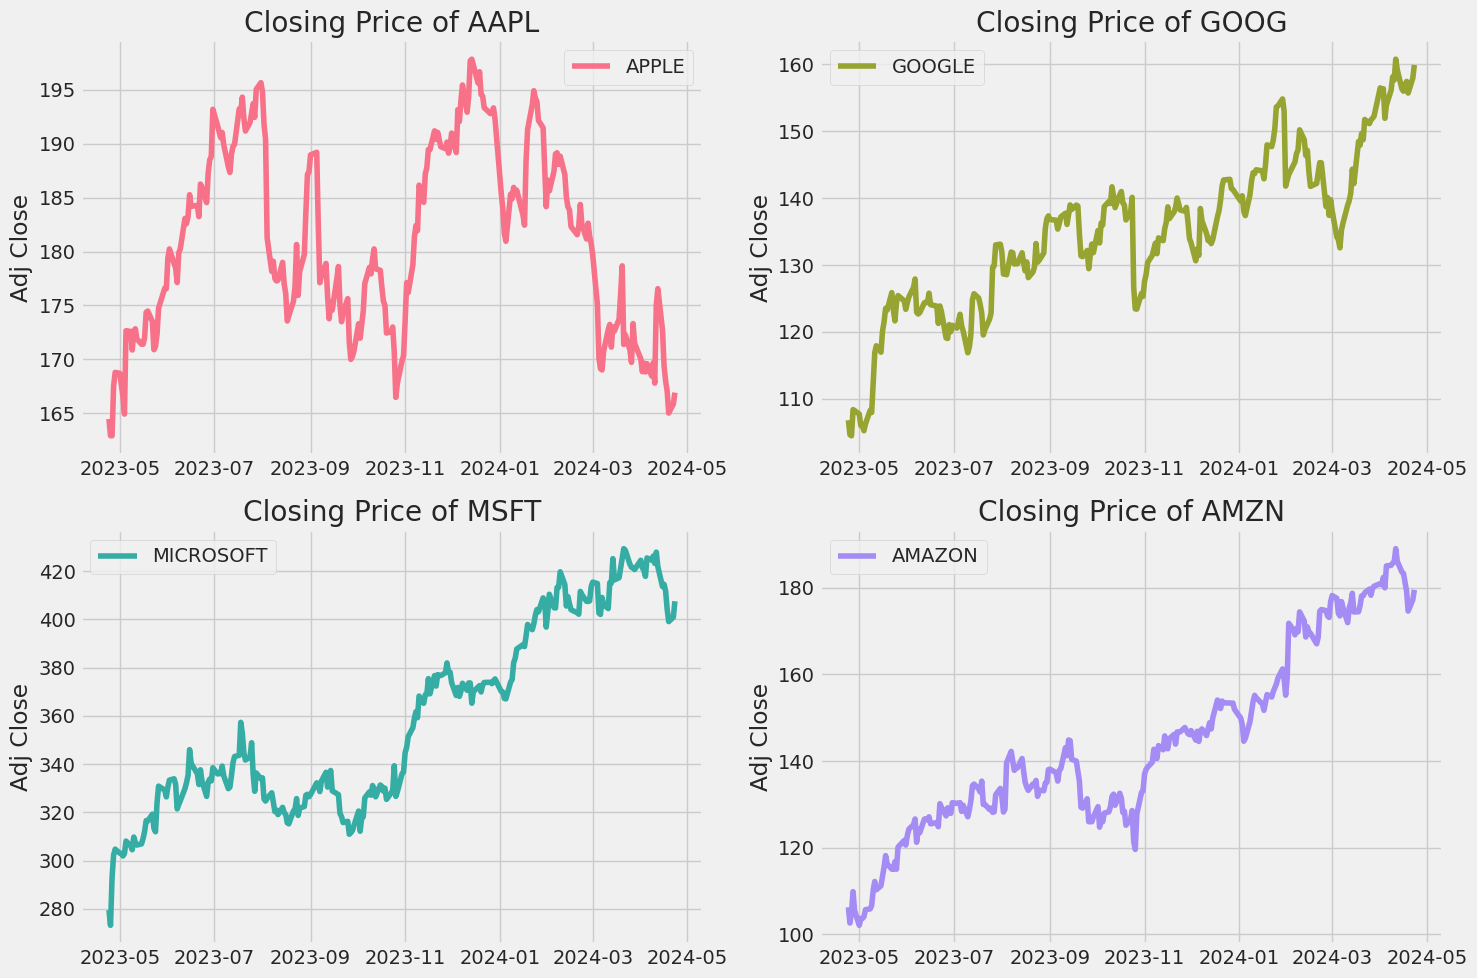

In [14]:
# Let's create a more unique and beautiful visualization for the time series closing price

import seaborn as sns

# Setting up the figure and axes
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=0.8)

# Define a color palette for the plot
colors = sns.color_palette("husl", len(company_list))

# Plotting the adjusted closing price for each company with different line styles and colors
for i, (company, color) in enumerate(zip(company_list, colors), 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=company, x=company.index, y='Adj Close', color=color, label=f'{company_name[i - 1]}')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()


# Volume Of Sale

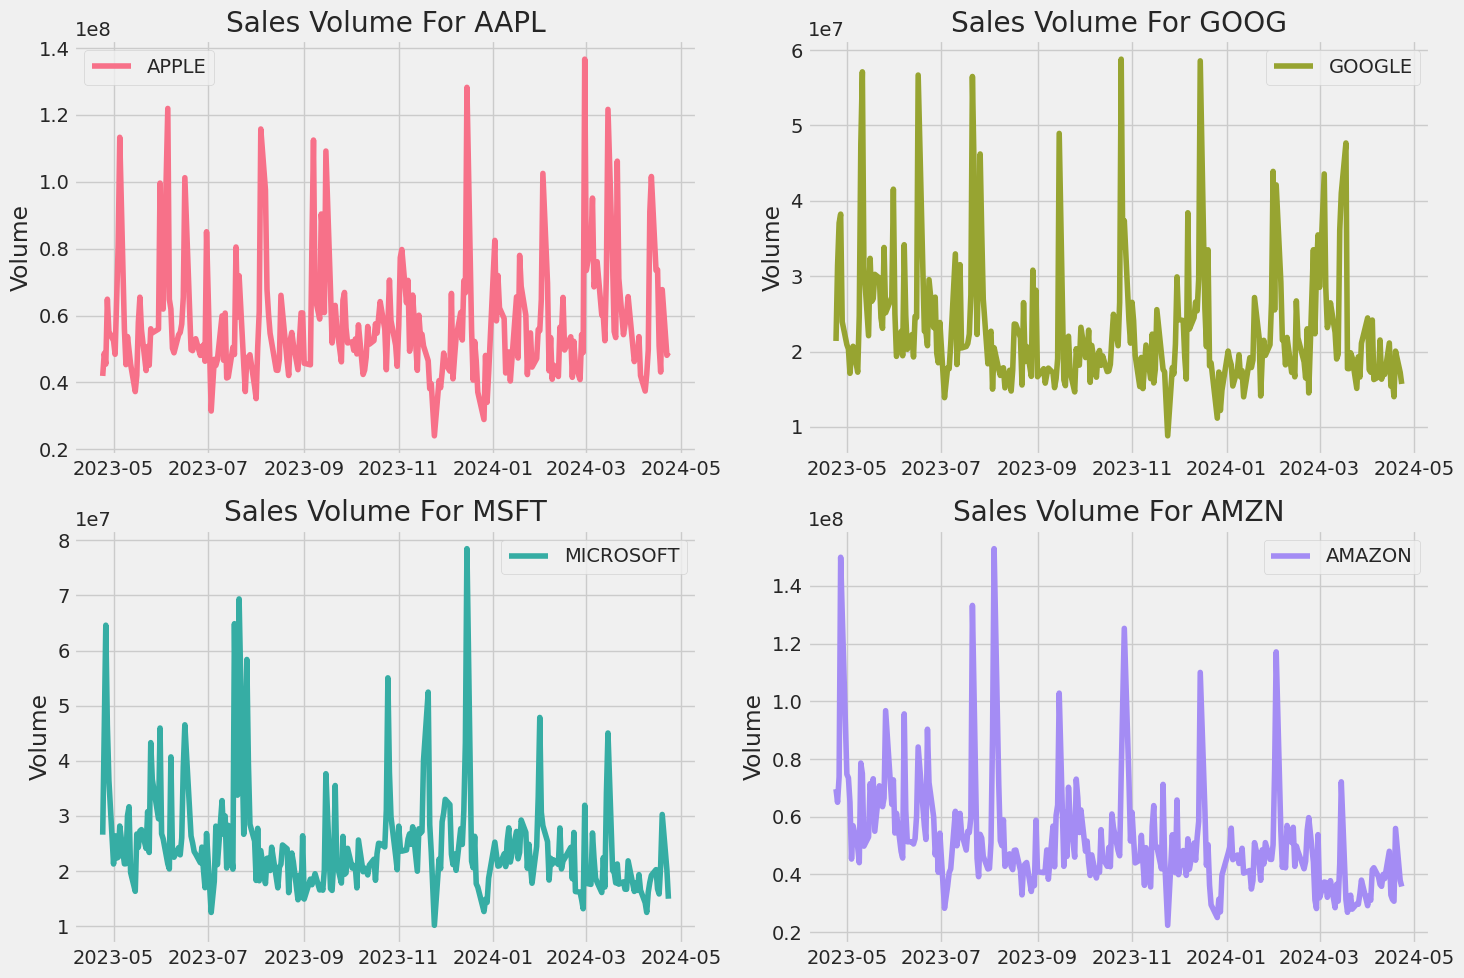

In [15]:
#now let plot the total volume of stock being traded each day

# Setting up the figure and axes
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=0.8)

# Define a color palette for the plot
colors = sns.color_palette("husl", len(company_list))

# Plotting the adjusted closing price for each company with different line styles and colors
for i, (company, color) in enumerate(zip(company_list, colors), 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=company, x=company.index, y='Volume', color=color, label=f'{company_name[i - 1]}')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume For {tech_list[i - 1]}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()

# What was the moving average of various stocks?

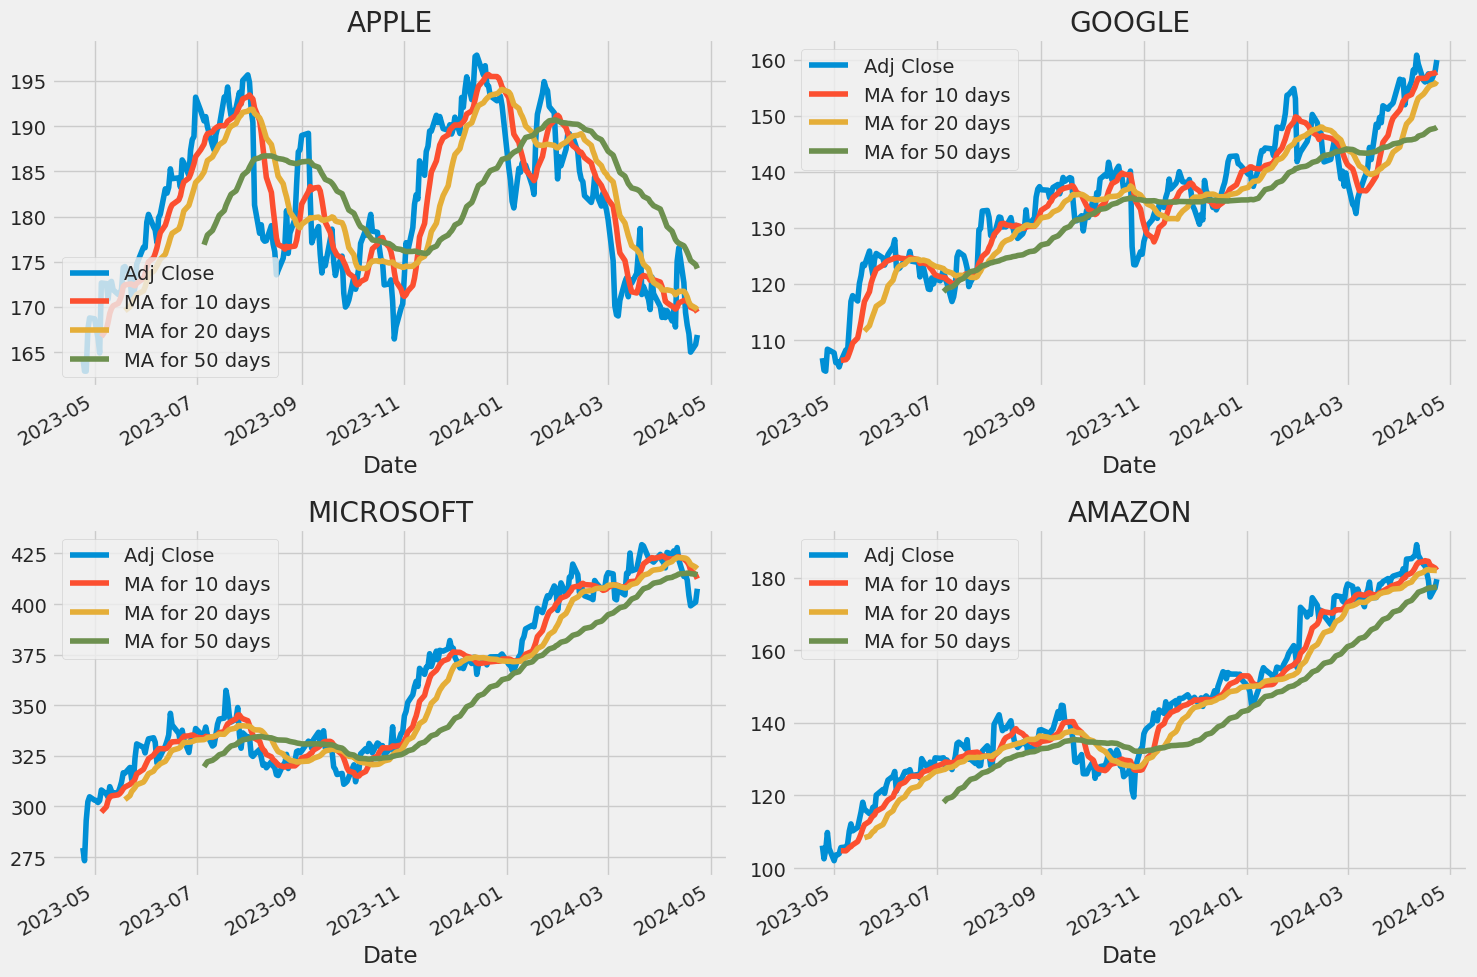

In [17]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Daily Return of the Average

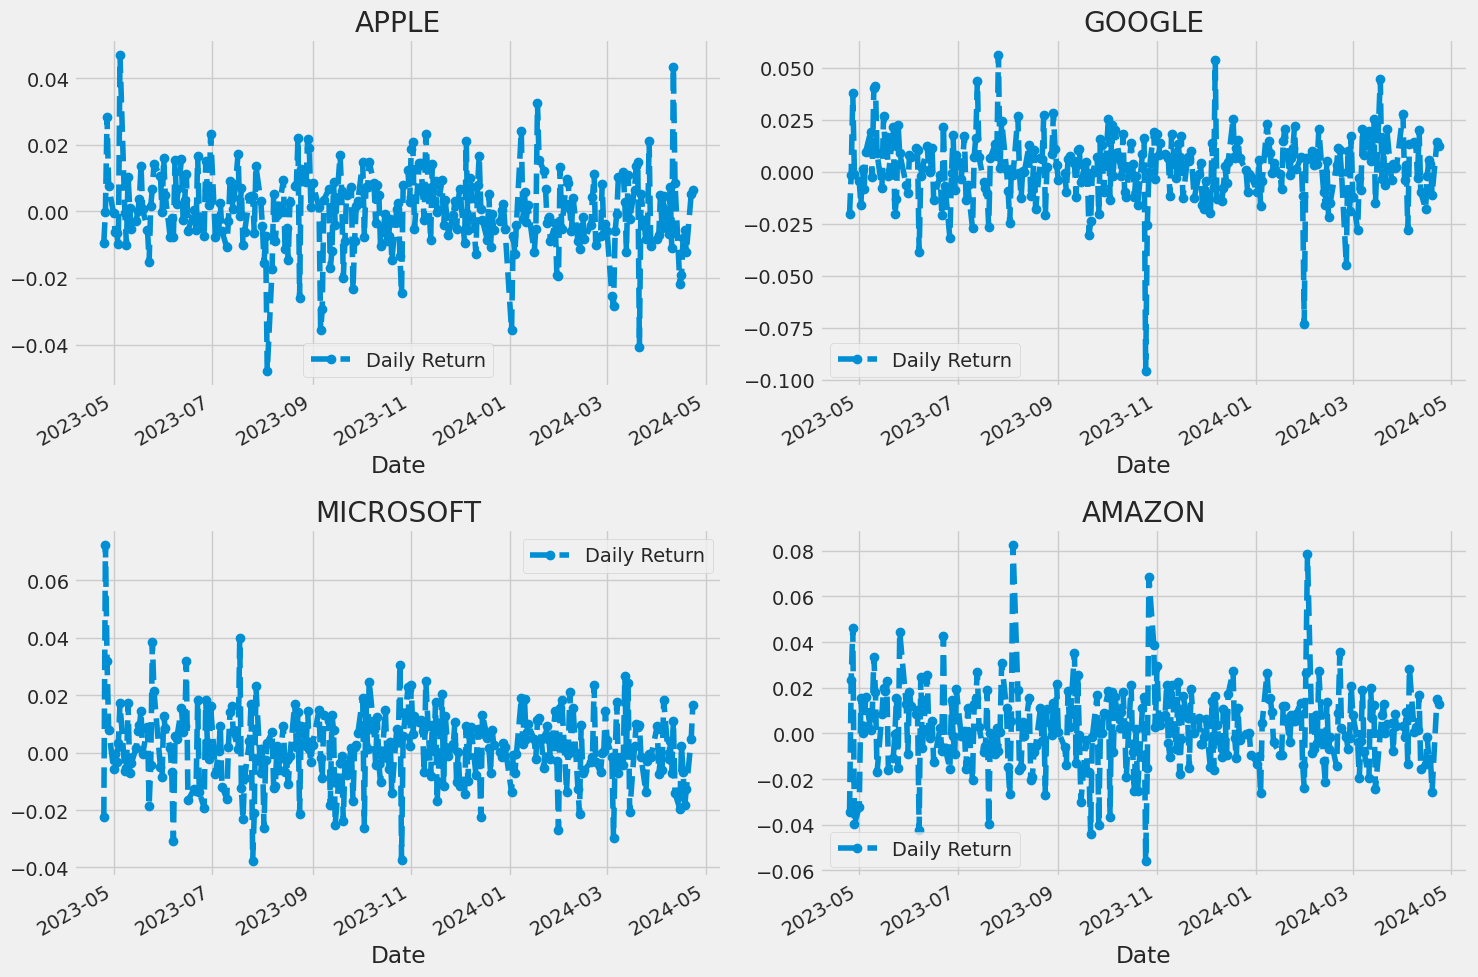

In [18]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Corelation Between Different Stocks Closing Price

In [19]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end = end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-24,NaN,NaN,NaN,NaN
2023-04-25,-0.009436,-0.034272,-0.020322,-0.022536
2023-04-26,-0.000061,0.023496,-0.001530,0.072435
2023-04-27,0.028395,0.046104,0.037530,0.032028
2023-04-28,0.007541,-0.039792,-0.001384,0.007972


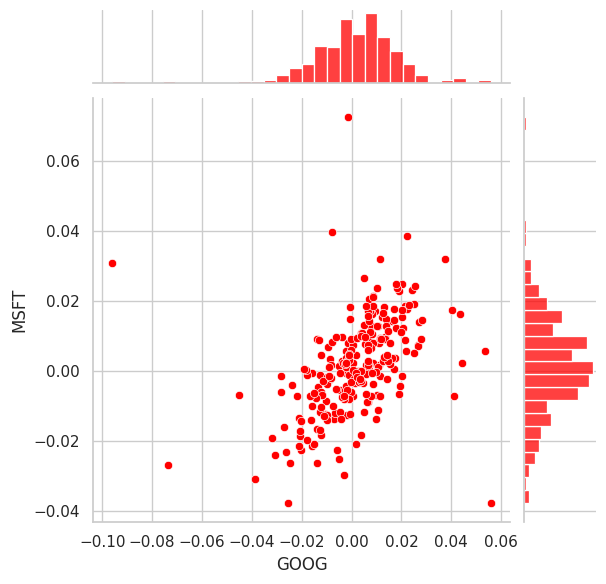

In [54]:
import seaborn as sns

# Set style and context for seaborn
sns.set(style="whitegrid")

# Adjust marginal distributions
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='red', marginal_kws=dict(bins=30, fill=True))

plt.show()


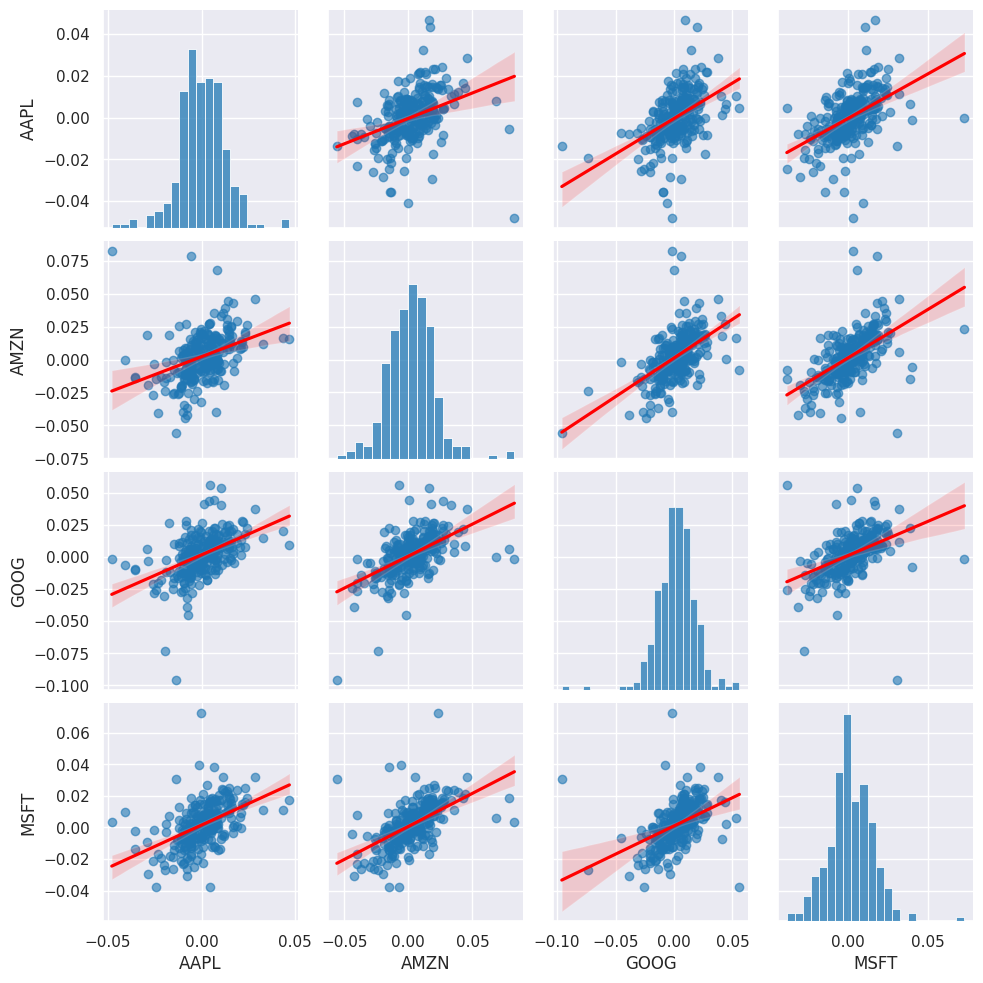

In [22]:
import seaborn as sns

# Set style and context for seaborn
sns.set(style="whitegrid")

# Customize plot style
sns.set_palette("tab10")
sns.set_style("darkgrid")

# Create pairplot with red regression lines and black background
sns.pairplot(tech_rets, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}})
plt.show()


# we can see all the relationship on daily returns between allthe stocks. a quick glance shows an interesting correlation between google and amazone daily returns.

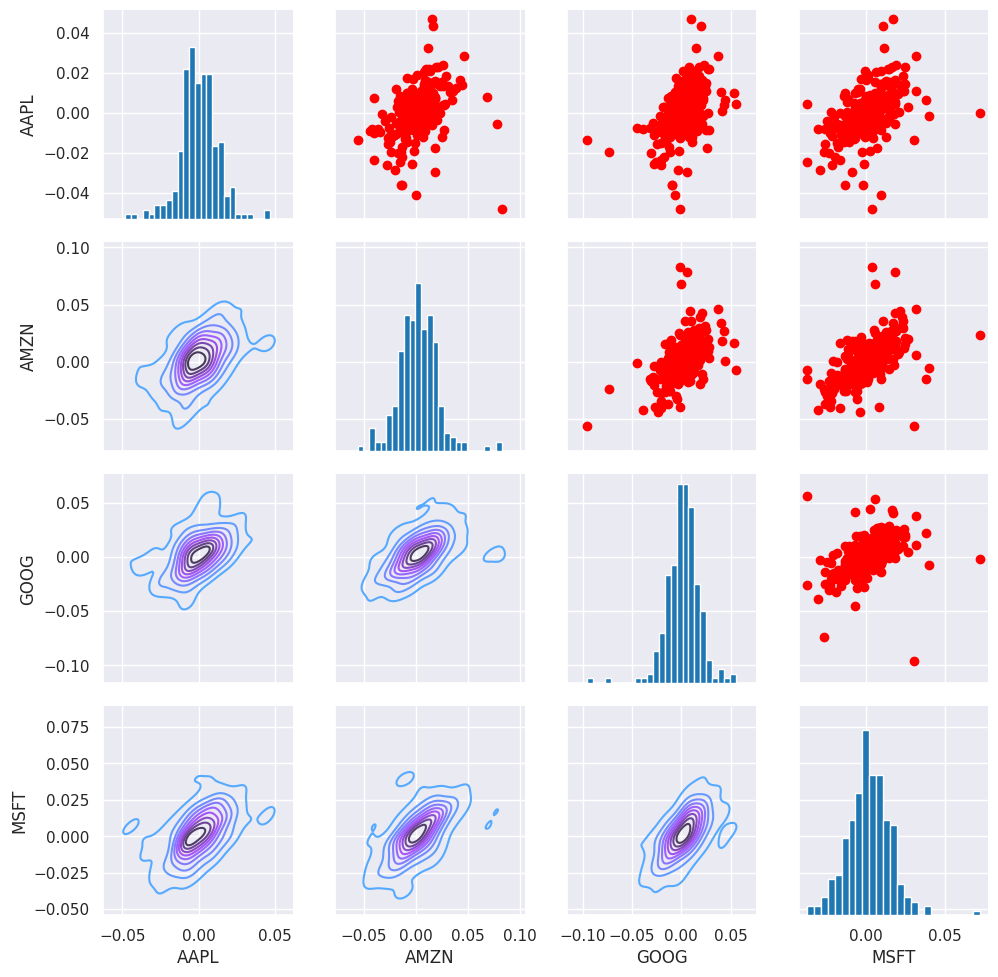

In [23]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color = 'red')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 25)

# <p style="background-image: url(https://img.freepik.com/free-vector/gradient-stock-market-concept_23-2149166910.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Predicting The Closing Price Stock</p>

In [55]:
df = pdr.get_data_yahoo('AAPL', start = '2010-01-01', end = datetime.now())

[*********************100%%**********************]  1 of 1 completed


In [56]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.6225,7.660714,7.585,7.643214,6.47074,493729600


In [57]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,48917700


In [58]:
df.shape

(3600, 6)

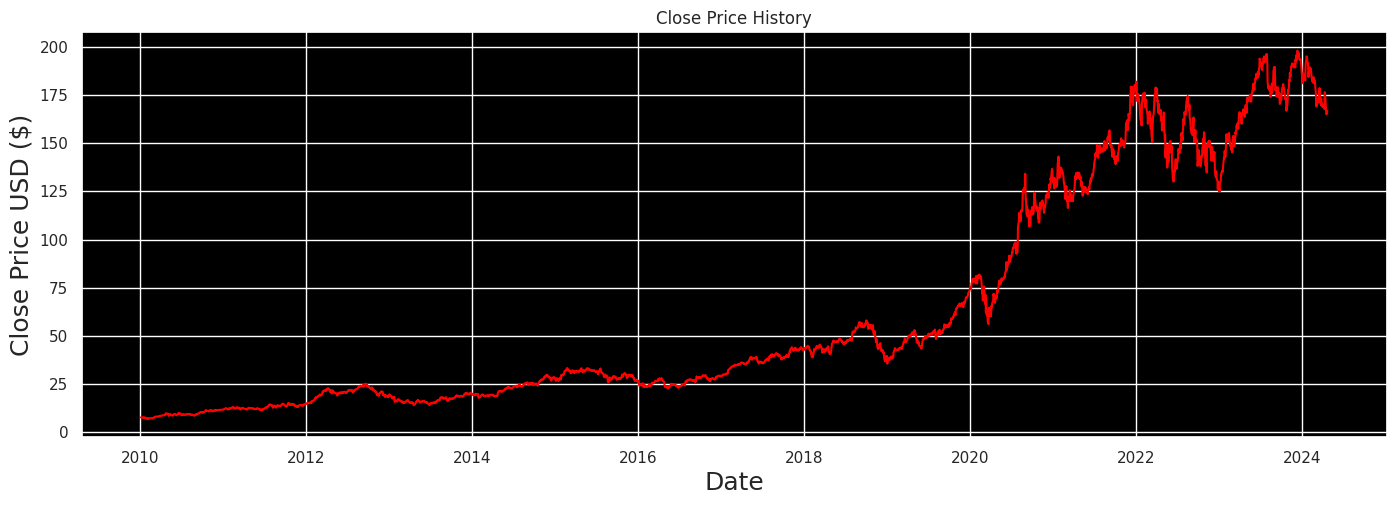

In [29]:
plt.figure(figsize=(15,5))
plt.title('Close Price History')
plt.plot(df['Close'], color = 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.gca().set_facecolor('black')
plt.show()

In [59]:
# Create a new dataframe with the close colums
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

3420

In [60]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.00410081],
       [0.00416991],
       [0.00353313],
       ...,
       [0.82687678],
       [0.8312689 ],
       [0.83681134]])

In [61]:
# Creating the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# split the data in to trian and test set
xtrain = []
ytrain= []

for i in range(10, len(train_data)):
    xtrain.append(train_data[i-10:i, 0])
    ytrain.append(train_data[i, 0])

    if i<=11:
        print(xtrain)
        print(ytrain)
        print()


[array([0.00410081, 0.00416991, 0.00353313, 0.00346029, 0.00372173,
       0.00337253, 0.00292622, 0.00347336, 0.00324554, 0.00259195])]
[0.0042931559276671305]

[array([0.00410081, 0.00416991, 0.00353313, 0.00346029, 0.00372173,
       0.00337253, 0.00292622, 0.00347336, 0.00324554, 0.00259195]), array([0.00416991, 0.00353313, 0.00346029, 0.00372173, 0.00337253,
       0.00292622, 0.00347336, 0.00324554, 0.00259195, 0.00429316])]
[0.0042931559276671305, 0.003675048783658548]



In [62]:
# Convert the xtrain and ytrain to numpy arrays
xtrain,ytrain = np.array(xtrain), np.array(ytrain)
# Reshape the data
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

# Model Training

In [63]:
# prompt: add early stoping too

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')

model.fit(xtrain, ytrain,epochs=100, callbacks=[early_stopping])
model.summary()


Epoch 1/100
107/107 [==============================] - 5s 6ms/step - loss: 0.0043
Epoch 2/100
107/107 [==============================] - 1s 6ms/step - loss: 2.0918e-04
Epoch 3/100
107/107 [==============================] - 1s 6ms/step - loss: 2.3007e-04
Epoch 4/100
107/107 [==============================] - 1s 5ms/step - loss: 2.2984e-04
Epoch 5/100
107/107 [==============================] - 1s 6ms/step - loss: 2.4149e-04
Epoch 6/100
107/107 [==============================] - 1s 7ms/step - loss: 2.2027e-04
Epoch 7/100
107/107 [==============================] - 1s 8ms/step - loss: 2.3063e-04
Epoch 8/100
107/107 [==============================] - 1s 8ms/step - loss: 2.0349e-04
Epoch 9/100
107/107 [==============================] - 1s 6ms/step - loss: 2.0617e-04
Epoch 10/100
107/107 [==============================] - 1s 6ms/step - loss: 1.9947e-04
Epoch 11/100
107/107 [==============================] - 1s 6ms/step - loss: 2.0434e-04
Epoch 12/100
107/107 [==============================] - 

# Creating a Testing Dataset

In [65]:
test_data = scaled_data[training_data_len -10:, :]
# Create the data sets xtest and ytest
xtest = []
ytest = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
    xtest.append(test_data[i - 10:i, 0])


# convert the data to a numpy array
xtest = np.array(xtest)

xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
# Reshape the data

# Get the models predicted price value
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
rmse

6/6 [==============================] - 1s 3ms/step


2.229165978992478

# Plot Predition Data With Actual Data

<ipython-input-67-8a52f1bb1909>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


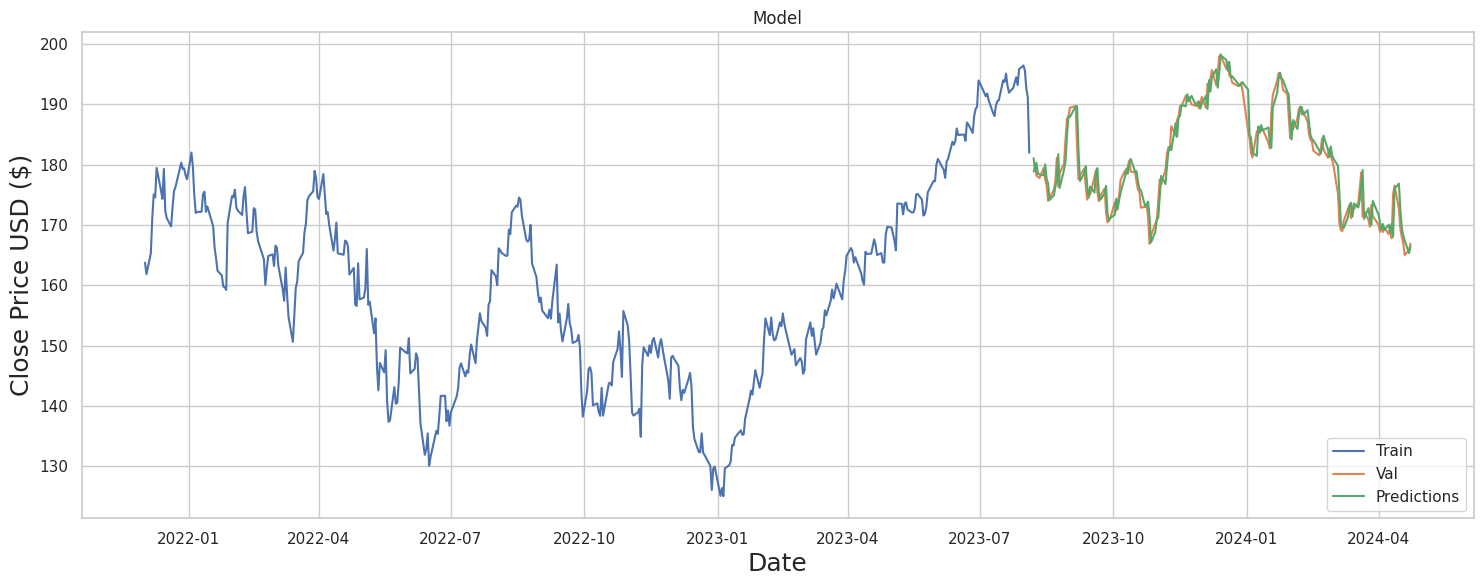

In [67]:
train = data[3000:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()


In [68]:
valid

,Close,Predictions
Date,,
2023-08-07,178.850006,181.077454
2023-08-08,179.800003,178.984985
2023-08-09,178.190002,180.309769
2023-08-10,177.970001,178.420380
2023-08-11,177.789993,178.425720
...,...,...
2024-04-17,168.000000,169.523621
2024-04-18,167.039993,168.327805
2024-04-19,165.000000,167.399872


In [69]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
